In [1]:
import h5py
import numpy as np

In [2]:
# Load processed data

dataset = "train"

h5f_X = h5py.File('X_' + dataset + '.h5', 'r')
X = h5f_X['data'][:]
h5f_X.close()

h5f_y = h5py.File('y_' + dataset + '.h5', 'r')
y = h5f_y['data'][:]
h5f_y.close()

# Create truth label mask
top = y.reshape((-1)) == 1
qcd = y.reshape((-1)) == 0

# Extend truth label mask for constituents
toplong = (y * np.ones((top.shape[0], 13))).reshape((-1)) == 1
qcdlong = (y * np.ones((qcd.shape[0], 13))).reshape((-1)) == 0

In [3]:
# Print head of data
def printData(length = 2):
    print(X[:length])
    print(y[:length])

In [4]:
printData()

[[[ 474.07114   -250.34703   -223.65196   -334.7381   ]
  [ 103.23624    -48.866222   -56.790775   -71.02549  ]
  [ 105.25557    -55.415      -49.968887   -74.23627  ]
  [  40.176777   -21.760696   -18.717611   -28.112215 ]
  [  22.428583   -11.835756   -10.374107   -15.979177 ]
  [  20.334389   -10.950519    -9.54544    -14.228777 ]
  [  19.0309     -10.243264    -9.004837   -13.272662 ]
  [  13.460596    -7.343364    -6.3597436   -9.317527 ]
  [  11.226108    -5.981516    -5.456269    -7.7766376]
  [  10.445061    -5.4606247   -4.8545246   -7.4642115]
  [   9.07727     -5.8113647   -3.4854696   -6.039567 ]
  [   9.056221    -4.758406    -4.0972114   -6.5257626]
  [   6.9631824   -3.4908166   -3.0960207   -5.168633 ]]

 [[ 150.50453    120.06239     76.852005   -48.274265 ]
  [  82.25706     63.80174     42.754807   -29.454842 ]
  [  48.57356     36.7632      26.990648   -16.714146 ]
  [  47.044415    36.609283    24.497763   -16.51657  ]
  [  28.850746    22.804417    14.43698    -10

In [5]:
# Truth label counts
def countData():
    print(str(np.sum(y)) + " top out of " + str(y.size) + " total jets")

In [6]:
countData()

605477 top out of 1211000 total jets


In [7]:
# Compute jet four-momenta
jet_p = X.sum(axis = 1)
# Reshape constituent four-momenta
constituent_p = X.reshape((-1, 4))

In [8]:
# Get energy
jet_E = jet_p[:, 0]
constituent_E = constituent_p[:, 0]

# Compute azimuthal angle
jet_phi = np.arctan(jet_p[:, 2] / jet_p[:, 1])
constituent_phi = np.arctan(constituent_p[:, 2] / constituent_p[:, 1])

# Compute transverse momentum
jet_pt = jet_p[:, 1] / np.cos(jet_phi)
constituent_pt = constituent_p[:, 1] / np.cos(constituent_phi)

# Compute pseudorapidity
jet_eta = np.arcsinh(jet_p[:, 3] / jet_pt)
constituent_eta = np.arcsinh(constituent_p[:, 3] / constituent_pt)

# Compute rest mass
jet_m = np.sqrt(np.square(jet_E) - np.square(np.linalg.norm(jet_p[:, 1:], axis = 1)))
constituent_m = np.sqrt(np.square(constituent_E) - np.square(np.linalg.norm(constituent_p[:, 1:], axis = 1)))

In [9]:
# Plot stuff
import matplotlib.pyplot as plt

def makePlot(array, prop, title, high_level = True):
    plt.title(title)
    plt.xlabel(prop)
    plt.ylabel("Prob. Density (a.u.)")

    if high_level:
        topmask = top
        qcdmask = qcd
    else:
        topmask = toplong
        qcdmask = qcdlong
    
    topbins = np.histogram_bin_edges(array[topmask], bins = 'auto')

    plt.hist(array[topmask], bins = topbins, histtype = 'step', color = 'tab:red', label = 'top')
    plt.hist(array[qcdmask], bins = topbins, histtype = 'step', color = 'tab:blue', label = 'qcd')
    plt.legend()
    plt.savefig("zenodo/feature-exploration/" + title + ".png")
    plt.show()
    plt.clf()

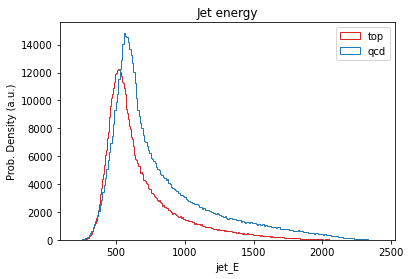

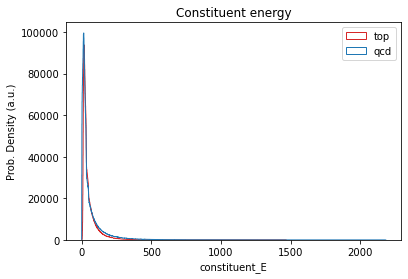

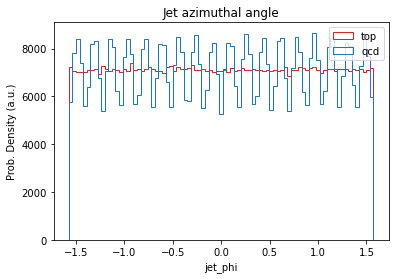

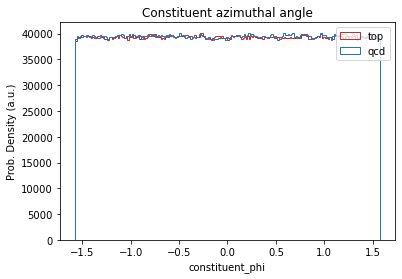

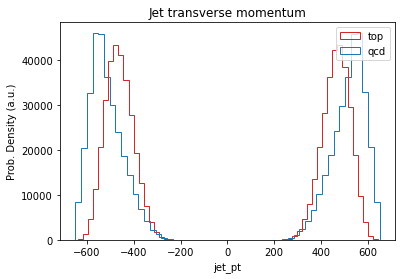

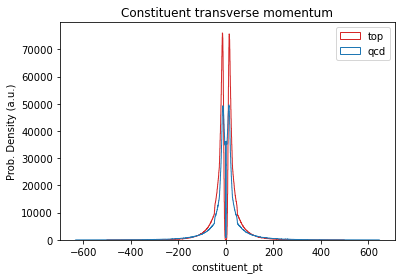

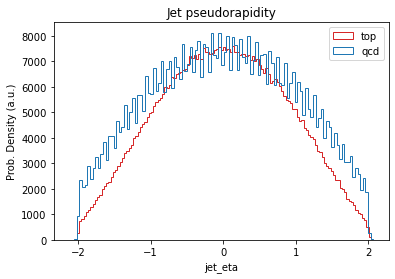

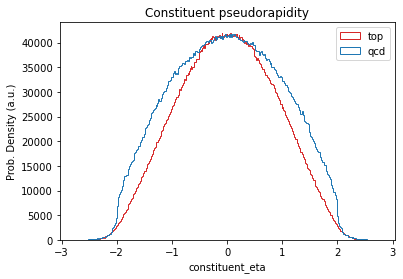

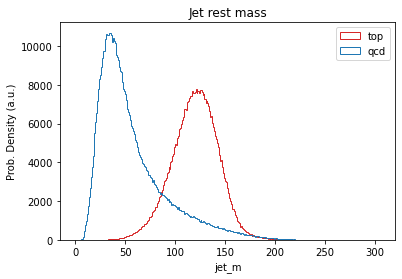

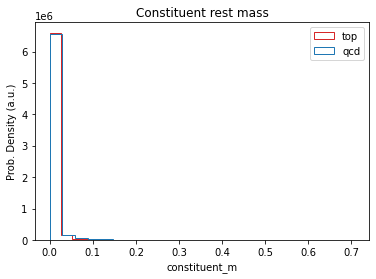

<Figure size 432x288 with 0 Axes>

In [10]:
makePlot(jet_E, "jet_E", "Jet energy")
makePlot(constituent_E, "constituent_E", "Constituent energy", False)

makePlot(jet_phi, "jet_phi", "Jet azimuthal angle")
makePlot(constituent_phi, "constituent_phi", "Constituent azimuthal angle", False)

makePlot(jet_pt, "jet_pt", "Jet transverse momentum")
makePlot(constituent_pt, "constituent_pt", "Constituent transverse momentum", False)

makePlot(jet_eta, "jet_eta", "Jet pseudorapidity")
makePlot(constituent_eta, "constituent_eta", "Constituent pseudorapidity", False)

makePlot(jet_m, "jet_m", "Jet rest mass")
makePlot(constituent_m, "constituent_m", "Constituent rest mass", False)